#  House Price Prediction project using K-Nearest Neighbors (KNN) and Machine Learning

1. Objective: Predict the price of a house based on features like location, size, number of rooms, and age of the property.

2. Dataset: Use a dataset with features like square footage, number of bedrooms, bathrooms, and other property-related details.

3. Data Preprocessing: Clean the data by handling missing values, removing duplicates, and encoding categorical variables if needed.

4. Feature Scaling: Normalize or standardize numerical features to ensure that KNN can effectively calculate distances between data points.

5. KNN Algorithm: Use K-Nearest Neighbors to predict house prices. KNN looks at the 'K' closest houses to predict the price of a new house.

6. Choosing 'K' Value: Test different values of 'K' (number of nearest neighbors) to find the one that gives the best prediction results.

7. Data Splitting: Split the dataset into training and testing sets to evaluate how well the model predicts unseen data.

8. Model Training: Train the KNN model on the training dataset, allowing it to learn patterns between house features and prices.

9. Evaluation Metrics: Use metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared to evaluate prediction accuracy.

10. Model Tuning: Adjust the KNN parameters and test again to improve model performance and make more accurate price predictions.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('house_data.csv')

In [3]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
data = data[['price','waterfront','sqft_living','bedrooms','bathrooms','floors','condition','grade']]

In [6]:
data

,price,waterfront,sqft_living,bedrooms,bathrooms,floors,condition,grade
0,221900.0,0,1180,3,1.00,1.0,3,7
1,538000.0,0,2570,3,2.25,2.0,3,7
2,180000.0,0,770,2,1.00,1.0,3,6
3,604000.0,0,1960,4,3.00,1.0,5,7
4,510000.0,0,1680,3,2.00,1.0,3,8
...,...,...,...,...,...,...,...,...
21608,360000.0,0,1530,3,2.50,3.0,3,8
21609,400000.0,0,2310,4,2.50,2.0,3,8
21610,402101.0,0,1020,2,0.75,2.0,3,7
21611,400000.0,0,1600,3,2.50,2.0,3,8


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   waterfront   21613 non-null  int64  
 2   sqft_living  21613 non-null  int64  
 3   bedrooms     21613 non-null  int64  
 4   bathrooms    21613 non-null  float64
 5   floors       21613 non-null  float64
 6   condition    21613 non-null  int64  
 7   grade        21613 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.3 MB


In [8]:
data.loc[10:20,'bedrooms'] = np.nan

In [9]:
data.head(30)

,price,waterfront,sqft_living,bedrooms,bathrooms,floors,condition,grade
0,221900.0,0,1180,3.0,1.00,1.0,3,7
1,538000.0,0,2570,3.0,2.25,2.0,3,7
2,180000.0,0,770,2.0,1.00,1.0,3,6
3,604000.0,0,1960,4.0,3.00,1.0,5,7
4,510000.0,0,1680,3.0,2.00,1.0,3,8
5,1225000.0,0,5420,4.0,4.50,1.0,3,11
6,257500.0,0,1715,3.0,2.25,2.0,3,7
7,291850.0,0,1060,3.0,1.50,1.0,3,7
8,229500.0,0,1780,3.0,1.00,1.0,3,7
9,323000.0,0,1890,3.0,2.50,2.0,3,7


In [10]:
missing = data.isna().sum()

In [11]:
missing

price           0
waterfront      0
sqft_living     0
bedrooms       11
bathrooms       0
floors          0
condition       0
grade           0
dtype: int64

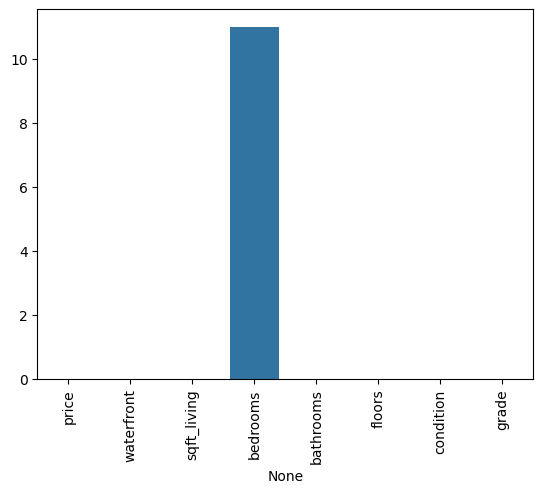

In [12]:
sns.barplot(x=missing.index,y=missing.values)
plt.xticks(rotation=90);

<Axes: xlabel='price', ylabel='Count'>

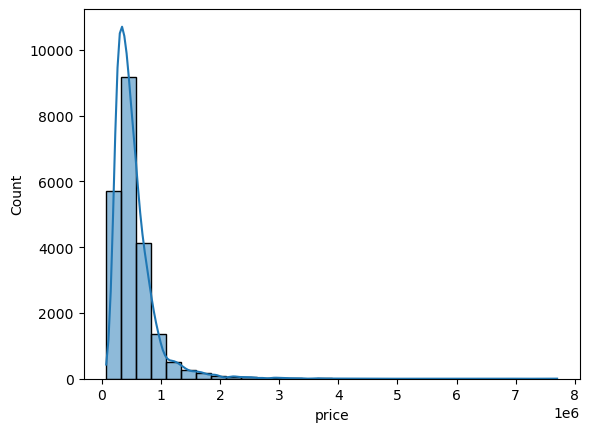

In [13]:
sns.histplot(data['price'],kde=True, bins = 30)

<Axes: >

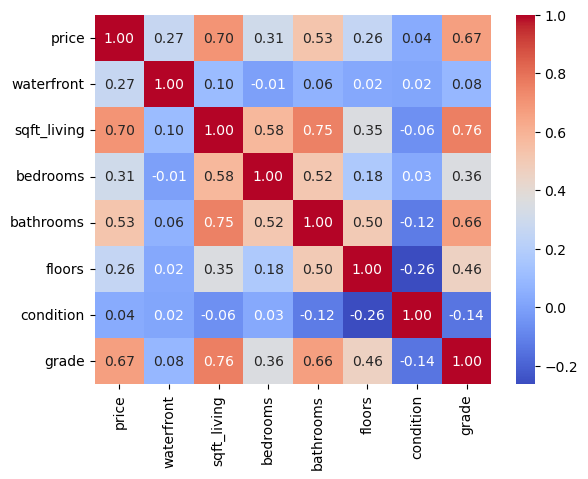

In [14]:
sns.heatmap(data.corr(numeric_only=True),annot=True,fmt='.2f',cmap='coolwarm')

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
imp = SimpleImputer(strategy ='median')
data['bedrooms'] = imp.fit_transform(data[['bedrooms']])

In [17]:
data.head(30)

,price,waterfront,sqft_living,bedrooms,bathrooms,floors,condition,grade
0,221900.0,0,1180,3.0,1.00,1.0,3,7
1,538000.0,0,2570,3.0,2.25,2.0,3,7
2,180000.0,0,770,2.0,1.00,1.0,3,6
3,604000.0,0,1960,4.0,3.00,1.0,5,7
4,510000.0,0,1680,3.0,2.00,1.0,3,8
5,1225000.0,0,5420,4.0,4.50,1.0,3,11
6,257500.0,0,1715,3.0,2.25,2.0,3,7
7,291850.0,0,1060,3.0,1.50,1.0,3,7
8,229500.0,0,1780,3.0,1.00,1.0,3,7
9,323000.0,0,1890,3.0,2.50,2.0,3,7


In [18]:
data['waterfront'].dtype

dtype('int64')

In [19]:
data.isna().sum()

price          0
waterfront     0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
condition      0
grade          0
dtype: int64

In [20]:
 data.loc[50,'price'] = data['price'].mean()*10

<Axes: xlabel='price'>

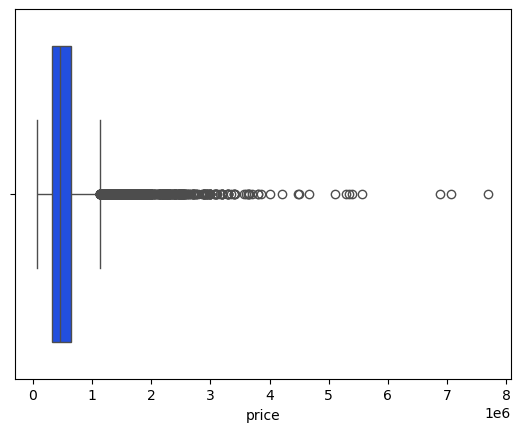

In [21]:
sns.boxplot(x=data['price'],palette='bright')

In [22]:
q1 = data['price'].quantile(0.25)
q3 = data['price'].quantile(0.75)
iqr = q3-q1
lower = q1-1.5*iqr
upper = q3+1.5*iqr

In [23]:
lower

-162500.0

In [24]:
upper

1129500.0

In [25]:
data = data[(data['price']>=lower)&(data['price']<=upper)]

In [26]:
data['price'].max()

1127500.0

<Axes: xlabel='price'>

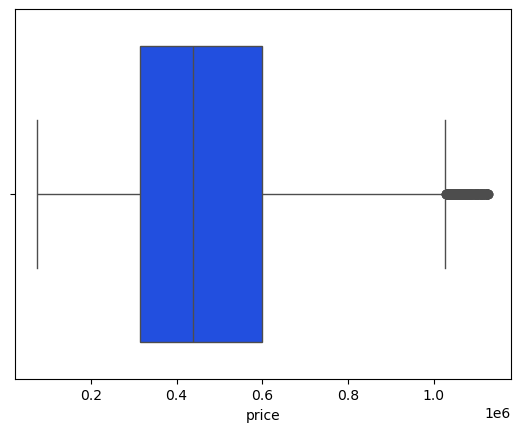

In [27]:
sns.boxplot(x=data['price'],palette='bright')

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
SSC = StandardScaler()

In [30]:
data.columns

Index(['price', 'waterfront', 'sqft_living', 'bedrooms', 'bathrooms', 'floors',
       'condition', 'grade'],
      dtype='object')

In [31]:
data['waterfront']

0        0
1        0
2        0
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: waterfront, Length: 20466, dtype: int64

In [32]:
data[['sqft_living', 'bedrooms', 'bathrooms', 'floors',
       'condition', 'grade']]= SSC.fit_transform(data[['sqft_living', 'bedrooms', 'bathrooms', 'floors',
       'condition', 'grade']])

In [33]:
data

,price,waterfront,sqft_living,bedrooms,bathrooms,floors,condition,grade
0,221900.0,0,-1.026823,-0.361151,-1.477357,-0.886476,-0.627886,-0.510580
1,538000.0,0,0.767156,-0.361151,0.278586,0.975642,-0.627886,-0.510580
2,180000.0,0,-1.555982,-1.456808,-1.477357,-0.886476,-0.627886,-1.472873
3,604000.0,0,-0.020129,0.734507,1.332152,-0.886476,2.462245,-0.510580
4,510000.0,0,-0.381506,-0.361151,-0.072602,-0.886476,-0.627886,0.451712
...,...,...,...,...,...,...,...,...
21608,360000.0,0,-0.575101,-0.361151,0.629775,2.837759,-0.627886,0.451712
21609,400000.0,0,0.431592,0.734507,0.629775,0.975642,-0.627886,0.451712
21610,402101.0,0,-1.233324,-1.456808,-1.828546,0.975642,-0.627886,-0.510580
21611,400000.0,0,-0.484757,-0.361151,0.629775,0.975642,-0.627886,0.451712


In [34]:
X = data.drop('waterfront',axis=1)
y = data['waterfront']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [37]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

In [38]:
knn_cl = KNeighborsClassifier(n_neighbors=5,metric='l2')

In [39]:
knn_cl.fit(X_train,y_train)

KNeighborsClassifier(metric='l2')

In [40]:
y_pred = knn_cl.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test,y_pred)

0.9968246213971665

In [50]:
X = data.drop('price',axis=1)
y = data['price']

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [52]:
knn_rg = KNeighborsRegressor(n_neighbors=5,metric='l2')

In [53]:
knn_rg.fit(X_train,y_train)

KNeighborsRegressor(metric='l2')

In [54]:
y_pred = knn_rg.predict(X_test)